In [1]:
import sys; sys.path.insert(0, '..')

In [2]:
from scripts.get_data import unified_DB, ceramiche_DB
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import numpy as np

In [3]:
X = unified_DB()
X = shuffle(X)

labled_X, labled_y = shuffle(*ceramiche_DB())

In [7]:
silhouette = []
intra_std = []
sum_intra_std = []
for n in range(2,101):
    c = KMeans(n_clusters=n)
    c.fit(X)
    silhouette.append((n, silhouette_score(X, c.predict(X))))

    stds = []
    for i in range(n):
        cluster_std = [x[0] for x in zip(labled_y, c.predict(labled_X)) if x[1] ==i]
        if len(cluster_std) > 1:
            stds.append(np.std(cluster_std))
    intra_std.append((n, np.mean(stds)))
    sum_intra_std.append((n, sum(stds)))


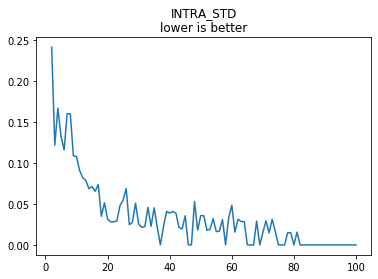

In [5]:
plt.plot(*zip(*intra_std))
plt.title('INTRA_STD\nlower is better')
plt.show()

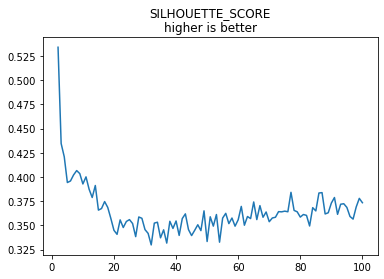

In [6]:
plt.plot(*zip(*silhouette))
plt.title('SILHOUETTE_SCORE\nhigher is better')
plt.show()